# Fundamentals of Machine Learning (CSCI-UA.473)

## Lab 5: Boosting and Introduction to Neural Networks

In [1]:
# Import and load dataset for this exercise - pip install palmerpenguins
from palmerpenguins import load_penguins
from sklearn import model_selection
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# This function returns a pandas dataframe by default (use return_X_y to get it in two numpy arrays)
penguins = load_penguins().dropna()
X = penguins[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']]
y = penguins['species']
print(X.shape, y.shape)
X.head()

(333, 4) (333,)


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


In [2]:
# Split the data.  DO NOT TOUCH THE TEST DATA FROM HERE ON!!
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, test_size = 0.2) # 0.2 is 20% test data.

In [3]:
# Next we implement gradient boosting, in particular the Adaboost algorithm.
# Remember, gradient boosting algorithms involve iteratively improving the decision trees
# and hence involve a learning rate similar to logistic regressions.
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier

# Create and fit an AdaBoosted decision tree
bdt = AdaBoostClassifier(
    tree.DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=2000, learning_rate=1
)
bdt.fit(X_train, y_train)


AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=1, n_estimators=2000)

In [4]:
preds = bdt.predict(X_test)
print(np.sum(preds == y_test)/len(preds))

0.9701492537313433


### Using a synthetic dataset to visualize effects of different hyperparameters

In [5]:
from sklearn.datasets import make_gaussian_quantiles

# Construct dataset
X1, y1 = make_gaussian_quantiles(
    cov=2.0, n_samples=200, n_features=2, n_classes=2, random_state=1
)
X2, y2 = make_gaussian_quantiles(
    mean=(3, 3), cov=1.5, n_samples=300, n_features=2, n_classes=2, random_state=1
)
X = np.concatenate((X1, X2))
y = np.concatenate((y1, -y2+1))

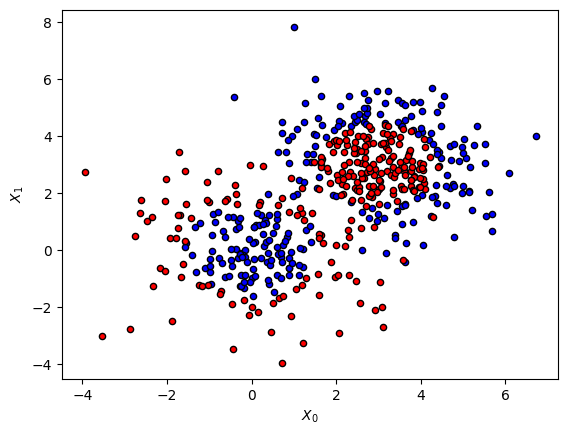

In [6]:
# Plot the training points
plot_colors = "br"
plot_step = 0.02
class_names = "AB"
for i, n, c in zip(range(2), class_names, plot_colors):
    idx = np.where(y == i)
    plt.scatter(
        X[idx, 0],
        X[idx, 1],
        c=c,
        cmap=plt.cm.Paired,
        s=20,
        edgecolor="k",
        label="Class %s" % n,
    )
    plt.xlabel(r'$X_0$')
    plt.ylabel(r'$X_1$')

In [7]:
# Create and fit an AdaBoosted decision tree - not creating splits for synthetic dataset (if you want to report how well your model does, you always should!)
bdt = AdaBoostClassifier(
    tree.DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=2000, learning_rate=1e-2
)
bdt.fit(X, y)

AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.01, n_estimators=2000)

Text(0.5, 1.0, 'Decision Boundary')

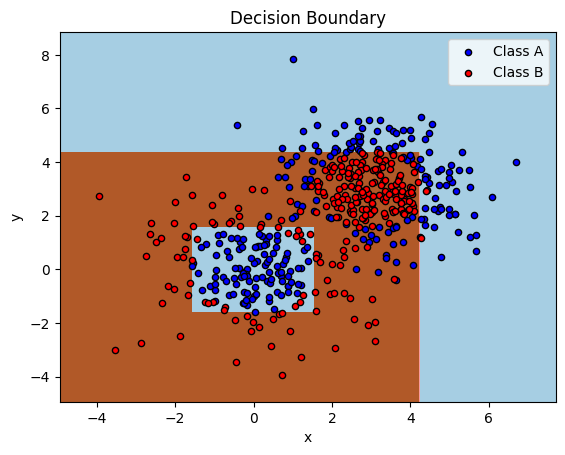

In [8]:
# Initialize the plots
plt.subplot(111)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
)

# Make predictions using fitted tree
Z = bdt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis("tight")

# Plot the training points
for i, n, c in zip(range(2), class_names, plot_colors):
    idx = np.where(y == i)
    plt.scatter(
        X[idx, 0],
        X[idx, 1],
        c=c,
        cmap=plt.cm.Paired,
        s=20,
        edgecolor="k",
        label="Class %s" % n,
    )
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc="upper right")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Decision Boundary")

## Part 2 : Perceptrons & Neural Networks

### Perceptrons using Sklearn

In [9]:
from sklearn.linear_model import Perceptron
from sklearn import model_selection
import matplotlib.pyplot as plt

In [10]:
clf = Perceptron(tol=1e-3, random_state=0, shuffle=True)
### This is equivalent to SGDClassifier(loss="perceptron", eta0=1, learning_rate="constant", penalty=None)
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train_norm = (X_train - mean) / std
clf.fit(X_train_norm,y_train)

Perceptron()

In [11]:
clf.score((X_test- mean) / std, y_test)

1.0


## What is PyTorch?

It’s a Python based scientific computing package targeted at two sets of audiences:

-  Tensorial library that uses the power of GPUs
-  A deep learning research platform that provides maximum flexibility and speed

In this class though we will not use any GPU based computation since most of the work (labs and assignments) will be done on your laptops. 

## Import the library

In [12]:
import torch  # <Ctrl> / <Shift> + <Return>

## The Torch Package

In [13]:
# Generate a tensor of size 2x3x4
t = torch.Tensor(2, 3, 4)
type(t)

torch.Tensor

In [14]:
# Get the size of the tensor
print(t.size(), t.shape[2])

torch.Size([2, 3, 4]) 4


### Vectors (1D Tensors)

In [15]:
# Creates a 1D tensor of integers 1 to 4
v = torch.Tensor([1, 2, 3, 4])

# Create a 2x4 tensor
m = torch.Tensor([[2, 5, 3, 7],
                  [4, 2, 1, 9]])

In [16]:
# Print number of dimensions (1D) and size of tensor
print(f'dim: {v.dim()}, size: {v.size()}')

# Print number of dimensions (2D) and size of tensor
print(f'dim: {m.dim()}, size: {m.size()}')

dim: 1, size: torch.Size([4])
dim: 2, size: torch.Size([2, 4])


In [17]:
# Element-wise multiplication
v * m

tensor([[ 2., 10.,  9., 28.],
        [ 4.,  4.,  3., 36.]])

In [18]:
# Scalar product: 1*1 + 2*0 + 3*2 + 4*0
m @ v

tensor([49., 47.])

In [19]:
# In-place replacement of random number from 0 to 10
x = torch.Tensor(5).random_(10)
x

tensor([2., 7., 8., 4., 7.])

In [20]:
print(f'first: {x[0]}, last: {x[-1]}')

first: 2.0, last: 7.0


### Constructors

In [21]:
# Create tensor from 3 to 8, with each having a space of 1
torch.arange(3., 8 + 1)

tensor([3., 4., 5., 6., 7., 8.])

In [22]:
# Create tensor from 5.7 to -2.1 with each having a space of -3
torch.arange(5.7, -2.1, -3)

tensor([ 5.7000,  2.7000, -0.3000])

In [23]:
# returns a 1D tensor of steps equally spaced points between start=3, end=8 and steps=20
torch.linspace(3, 8, 20).view(1, -1)

tensor([[3.0000, 3.2632, 3.5263, 3.7895, 4.0526, 4.3158, 4.5789, 4.8421, 5.1053,
         5.3684, 5.6316, 5.8947, 6.1579, 6.4211, 6.6842, 6.9474, 7.2105, 7.4737,
         7.7368, 8.0000]])

In [24]:
# Create a tensor filled with 0's
torch.zeros(3, 5)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [25]:
# Create a tensor filled with 1's
torch.ones(3, 2, 5)

tensor([[[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]])

In [26]:
# Create a tensor with the diagonal filled with 1
torch.eye(3)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

### Defining a model in pytorch

In [27]:
import random
import torch
from torch import nn, optim
import math
from IPython import display

In [28]:
# Define model architecture hyperparameters
D = 4  # input dimensions
C = 3  # num_classes
H = 10  # num_hidden_units

# Define training hyperparameters
learning_rate = 1e-2
lambda_l2 = 1e-1 # coefficient for the L2 regularizer. You should play with its value to see the effect of regularization

# nn package to create our linear model. Notice the Sequential container class. 
# Each Linear module has a weight and bias
# The order in which the Linear modules are defined is important as it creates the directed acyclic graph
model = nn.Sequential(
    nn.Linear(D, H),
    nn.Linear(H, C)
)

In [29]:
# Print the model
print(model)

Sequential(
  (0): Linear(in_features=4, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=3, bias=True)
)


In [30]:
# We need to preprocess our data and form tensors before we can use a PyTorch Model
from sklearn import preprocessing
import torch

# First move features present in pandas dataframes to tensors, this is straightforward
X_train_pth = torch.as_tensor(X_train.values, dtype=torch.float)
X_test_pth = torch.as_tensor(X_test.values, dtype=torch.float)

feature_means = torch.mean(X_train_pth, dim = 0)
feature_stds = torch.std(X_train_pth, dim=0)
print(feature_means.shape, feature_stds.shape)

# scaler = preprocessing.StandardScaler()
# X_train_pth = torch.tensor(scaler.fit_transform(X_train_pth), dtype=torch.float32)

X_train_pth = (X_train_pth - feature_means)/feature_stds

# Convert the labels need a little more care since Pytorch loss functions do not expect string labels
labels = y_train.unique() # Get all unique labels from our training set
le = preprocessing.LabelEncoder() # Define encoder using sklearn's LabelEncoder
targets = le.fit_transform(y_train) # Transform string targets to integers
# targets: array([0, 1, 2, 3, 4])

y_train_pth = torch.as_tensor(targets).long() # Finally put everything into a tensor

# Repeat for test labels
targets = le.fit_transform(y_test) # Transform string targets to integers

y_test_pth = torch.as_tensor(targets).long()

print(X_train_pth.shape,y_train_pth.shape, X_test_pth.shape, y_test_pth)
print(torch.mean(X_train_pth,dim=0), torch.std(X_train_pth,dim=0))

torch.Size([4]) torch.Size([4])
torch.Size([266, 4]) torch.Size([266]) torch.Size([67, 4]) tensor([2, 0, 0, 1, 0, 2, 2, 0, 2, 1, 1, 0, 1, 1, 0, 0, 0, 2, 0, 0, 2, 2, 1, 0,
        0, 2, 2, 0, 0, 0, 0, 2, 0, 1, 1, 2, 1, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 0,
        2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 1, 0, 2, 0, 2, 2, 0, 2])
tensor([ 3.2088e-07, -3.2267e-07, -1.3489e-07,  8.2461e-08]) tensor([1.0000, 1.0000, 1.0000, 1.0000])


In [31]:
# nn package has a variety of loss functions already implemented
# we use cross entropy loss for our classification task
criterion = torch.nn.CrossEntropyLoss()

# nn package also has a variety of optimization algorithms implemented
# we use the stochastic gradient descent for our parameter updates
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=lambda_l2) # built-in L2

# Training loop
for t in range(1000):
    
    # Forward pass over the model to get the logits 
    y_pred = model(X_train_pth) #1
    # print(y_pred)
    # Compute the loss and accuracy
    loss = criterion(y_pred, y_train_pth) #2
    
    # print(y_pred, y_train_pth)
    # break
    score, predicted = torch.max(y_pred, 1)
    acc = (y_train_pth == predicted).sum() / len(y_train)
    print("[EPOCH]: %i, [LOSS]: %.6f, [ACCURACY]: %.3f" % (t, loss.item(), acc))
    display.clear_output(wait=True)
    
    # reset (zero) the gradients before running the backward pass over the model
    # we need to do this because the gradients get accumulated at the same place across iterations
    optimizer.zero_grad() #3
    
    # Backward pass to compute the gradient of loss w.r.t our learnable params (weights and biases)
    loss.backward() #4
    
    # Update params
    optimizer.step() #5

[EPOCH]: 999, [LOSS]: 0.219297, [ACCURACY]: 0.974


In [32]:
# Make predictions on the test set
out = model(X_test_pth)
_, predicted = torch.max(out.data, 1)

#get accuration
print('Accuracy of the network %.4f %%' % (100 * torch.sum(y_test_pth==predicted).double() / len(y_test_pth)))


Accuracy of the network 32.8358 %


### Classification of non-linearly separable dataset using multi-layer perceptron
We will not demonstrate how to build a linear model and a neural network model using PyTorch and how to train it to classify a toy dataset which is not linearly separable. 

Import appropriate packages

In [33]:
# some predefined helper functions provided for plotting data and model outputs
from plot_lib import plot_data, plot_model, set_default

ModuleNotFoundError: No module named 'plot_lib'

In [ ]:
set_default()

In [ ]:
seed = 12345
random.seed(seed)
torch.manual_seed(seed)
N = 1000  # num_samples_per_class
D = 2  # dimensions
C = 3  # num_classes
H = 100  # num_hidden_units

### Create the dataset
We will now create a data set consisting of three classes and is in the shape of a spiral

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
X = torch.zeros(N * C, D).to(device)
y = torch.zeros(N * C, dtype=torch.long).to(device)
for c in range(C):
    index = 0
    t = torch.linspace(0, 1, N)
    # When c = 0 and t = 0: start of linspace
    # When c = 0 and t = 1: end of linpace
    # This inner_var is for the formula inside sin() and cos() like sin(inner_var) and cos(inner_Var)
    inner_var = torch.linspace(
        # When t = 0
        (2 * math.pi / C) * (c),
        # When t = 1
        (2 * math.pi / C) * (2 + c),
        N
    ) + torch.randn(N) * 0.2
    
    for ix in range(N * c, N * (c + 1)):
        X[ix] = t[index] * torch.FloatTensor((
            math.sin(inner_var[index]), math.cos(inner_var[index])
        ))
        y[ix] = c
        index += 1

print("Shapes:")
print("X:", tuple(X.size()))
print("y:", tuple(y.size()))

In [ ]:
# visualise the data using the plot_data function provided as a helper function
plot_data(X, y)

### Linear Model
We now define a linear classification model using PyTorch and train it using stochastic gradient descent with the help of the autograd package. 

Initialize some hyper-parameter values, such as, learning rate, regularization coefficient etc

In [ ]:
learning_rate = 1e-1
lambda_l2 = 1e-3 # coefficient for the L2 regularizer. You should play with its value to see the effect of regularization

Create the linear model and print it

In [ ]:
# nn package to create our linear model. Notice the Sequential container class. 
# Each Linear module has a weight and bias
# The order in which the Linear modules are defined is important as it creates the directed acyclic graph
model = nn.Sequential(
    nn.Linear(D, H),
    nn.Linear(H, C)
)

In [ ]:
# Print the model
print(model)

Create the training loop and print the metrics (loss and accuracy) at the end of each iteration

In [ ]:
# nn package has a variety of loss functions already implemented
# we use cross entropy loss for our classification task
criterion = torch.nn.CrossEntropyLoss()

# nn package also has a variety of optimization algorithms implemented
# we use the stochastic gradient descent for our parameter updates
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=lambda_l2) # built-in L2

# Training loop
for t in range(1000):
    
    # Forward pass over the model to get the logits 
    y_pred = model(X) #1
    
    # Compute the loss and accuracy
    loss = criterion(y_pred, y) #2
    # score, predicted = torch.max(y_pred, 1)
    # acc = (y == predicted).sum().float() / len(y)
    print("[EPOCH]: %i, [LOSS]: %.6f, [ACCURACY]: %.3f" % (t, loss.item(), acc))
    display.clear_output(wait=True)
    
    # reset (zero) the gradients before running the backward pass over the model
    # we need to do this because the gradients get accumulated at the same place across iterations
    optimizer.zero_grad() #3
    
    # Backward pass to compute the gradient of loss w.r.t our learnable params (weights and biases)
    loss.backward() #4
    
    # Update params
    optimizer.step() #5

Plot the output of the model (in this case a collection of hyper-planes)

In [ ]:
# Plot trained model
plot_model(X, y, model)

### Two layer neural network
We now define a two layer (single hidden layer) neural network model using PyTorch and train it using stochastic gradient descent with the help of the autograd package. 

Initialize the hyper-parameters like before. Play around with the learning rate and the regularization parameter to see their effect on the optimization. 

In [ ]:
learning_rate = 1e-1
lambda_l2 = 1e-3

Create and print the two layer MLP with ReLU as the activation units

In [ ]:
# nn package to create our linear model
# each Linear module has a weight and bias

model = nn.Sequential(
    nn.Linear(D, H),
    nn.ReLU(),
    nn.Linear(H,C)
    
)

print(model)

Create the training loop and print the metrics (loss and accuracy) at the end of each iteration

In [ ]:
# nn package has a variety of loss functions already implemented
# we use cross entropy loss for our classification task
criterion = torch.nn.CrossEntropyLoss()

# nn package also has a variety of optimization algorithms implemented
# we use the stochastic gradient descent for our parameter updates
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=lambda_l2) # built-in L2

# e = 1.  # plotting purpose

# Training
for t in range(1000):
    
    # Forward pass over the model to get the logits
    y_pred = model(X)
    
    # Compute the loss and accuracy
    loss = criterion(y_pred, y)
    score, predicted = torch.max(y_pred, 1)
    acc = (y == predicted).sum().float() / len(y)
    print("[EPOCH]: %i, [LOSS]: %.6f, [ACCURACY]: %.3f" % (t, loss.item(), acc))
    display.clear_output(wait=True)
    
    # reset (zero) the gradients before running the backward pass over the model
    # we need to do this because the gradients get accumulated at the same place across iterations
    optimizer.zero_grad()
    
    # Backward pass to compute the gradient of loss w.r.t our learnable params (weights and biases)
    loss.backward()
    
    # Update params
    optimizer.step()

In [ ]:
# Plot trained model
plot_model(X, y, model)

## Regression

We will now demonstrate how to build a linear model and a neural network model for a regression task using PyTorch.  

In [ ]:
import random
import torch
from torch import nn, optim
import math
from IPython import display
from plot_lib import plot_data, plot_model, set_default
from matplotlib import pyplot as plt

In [ ]:
set_default()

### Create the data

In [ ]:
seed = 1
random.seed(seed)
torch.manual_seed(seed)
N = 1000  # num_samples_per_class
D = 1  # dimensions
C = 1  # num_classes
H = 100  # num_hidden_units

In [ ]:
X = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1).to(device)
y = X.pow(3) + 0.3 * torch.rand(X.size()).to(device)

In [ ]:
print("Shapes:")
print("X:", tuple(X.size()))
print("y:", tuple(y.size()))

In [ ]:
plt.scatter(X.cpu().numpy(), y.cpu().numpy())
plt.axis('equal');

### Linear model

Initialize the values of the hyper-parameters

In [ ]:
learning_rate = 1e-3
lambda_l2 = 1e-5

Create the model and print it

In [ ]:
# nn package to create our linear model
# each Linear module has a weight and bias
model = nn.Sequential(
    nn.Linear(D, H),
    nn.Linear(H, C)
)

# print the model
print(model)

Create the training loop

In [ ]:
# we use MSE (mean squared error) loss from the nn package for our regression task
criterion = torch.nn.MSELoss()

# we use the optim package to apply stochastic gradient descent for our parameter updates
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=lambda_l2) # built-in L2

# Training loop
for t in range(1000):
    
    # forward pass over the model to get the logits (inputs to the loss function)
    y_pred = model(X)
    
    # Compute the loss (MSE)
    loss = criterion(y_pred, y)
    print("[EPOCH]: %i, [LOSS or MSE]: %.6f" % (t, loss.item()))
    display.clear_output(wait=True)
    
    # zero the gradients before running the backward pass
    optimizer.zero_grad()
    
    # Backward pass to compute the gradient of loss w.r.t our learnable params 
    loss.backward()
    
    # Update params
    optimizer.step()

In [ ]:
# Plot trained model
plt.scatter(X.data.cpu().numpy(), y.data.cpu().numpy())
plt.plot(X.data.cpu().numpy(), y_pred.data.cpu().numpy(), 'r-', lw=5)
plt.axis('equal');

Play around with the values of the hyper-parameters and the value of H (number of hidden units) to observe the change in the models being learnt